In [1]:
import os
print(os.path.expanduser('~'))

/Users/wangdongdong


In [29]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',20)
import csv

data_folder = os.path.join(os.path.expanduser('~'), 'Downloads', 'ionosphere')

data_filename = os.path.join(data_folder, 'ionosphere.data.txt')


In [30]:
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

In [31]:
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):        
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1] =='g'

In [32]:
X

array([[ 1.     ,  0.     ,  0.99539, ..., -0.54487,  0.18641, -0.453  ],
       [ 1.     ,  0.     ,  1.     , ..., -0.06288, -0.13738, -0.02447],
       [ 1.     ,  0.     ,  1.     , ..., -0.2418 ,  0.56045, -0.38238],
       ...,
       [ 1.     ,  0.     ,  0.94701, ...,  0.00442,  0.92697, -0.00577],
       [ 1.     ,  0.     ,  0.90608, ..., -0.03757,  0.87403, -0.16243],
       [ 1.     ,  0.     ,  0.8471 , ..., -0.06678,  0.85764, -0.06151]])

In [33]:
y

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True,

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

estimator.fit(X_train, y_train)

y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print('The accuracy is {0:.1f}%'.format(accuracy))

The accuracy is 86.4%


In [46]:
# Use cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, y, cv=10, scoring='accuracy')
average_accuracy = np.mean(scores)

print('The average accuracy is {0:.2f}'.format(average_accuracy))

The average accuracy is 0.83


In [47]:
average_accuracy = scores.mean()

print('The average accuracy is %.2f'% (average_accuracy))

The average accuracy is 0.83


In [48]:
# adjust predict result with different param

avg_scores = []
all_scores = []

parameter_values = list(range(1,21)) # Include 20 

for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors = n_neighbors)
    scores = cross_val_score(estimator, X, y, cv=10, scoring='accuracy')
    
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

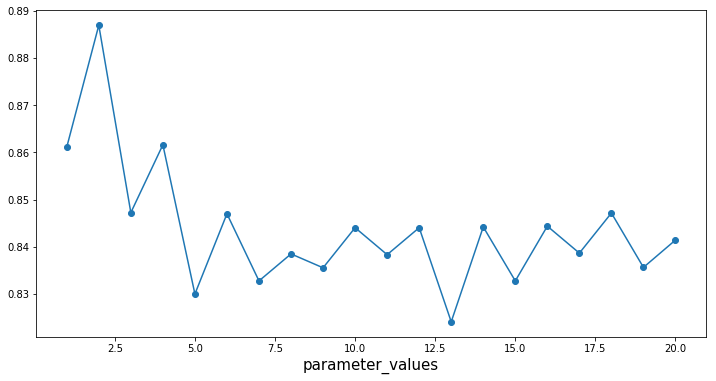

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(parameter_values, avg_scores, '-o')

plt.xlabel('parameter_values', fontsize=15)

plt.show()

In [61]:
# the pipeline usage
# Data preprocess

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                            ('predict', KNeighborsClassifier())])

#流水线的核心是元素为元组的列表。

scores = cross_val_score(scaling_pipeline, X_train, y_train,
                        scoring= 'accuracy')

print('The pipeline scored an average accuracy for is {0:.2f}%'.format(scores.mean()*100))


The pipeline scored an average accuracy for is 80.22%
